## Adding a variable to capture NA 

- Imputation assumes that the data is missing CAR

- We can capture the importance of NANs by creating an additional variable

### Pros

- Easy
- Works for MAR and MNAR datasets 

### Cons

- Expands the input feature space


**Data usually is missing for the same observation in multiple features, so we may have a lot of similar variables**

In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [102]:
from google.colab import drive
drive.mount('/content/gdrive')
data = pd.read_csv("gdrive/My Drive/Colab Notebooks/FeatureEngineering/train.csv")


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## Titanic

In [103]:
data = data[['Age', 'Fare','Survived']]
data.head()

,Age,Fare,Survived
0,22.0,7.2500,0
1,38.0,71.2833,1
2,26.0,7.9250,1
3,35.0,53.1000,1
4,35.0,8.0500,0


In [104]:
data.isnull().mean()

Age         0.198653
Fare        0.000000
Survived    0.000000
dtype: float64

In [105]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data[['Age', 'Fare']], data['Survived'], test_size=0.2)
X_train.shape, X_test.shape

((712, 2), (179, 2))

In [106]:
cols = ['Age', 'Fare']

for i in cols:
  if X_train[i].isnull().sum() > 0:
    X_train[i+"_NA"] = np.where(X_train[i].isnull(), 1, 0)
    X_test[i+"_NA"] = np.where(X_test[i].isnull(), 1, 0)

In [107]:
X_train.shape, X_test.shape

((712, 3), (179, 3))

In [108]:
X_train.columns

Index(['Age', 'Fare', 'Age_NA'], dtype='object')

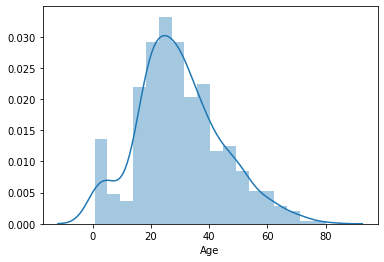

In [109]:
sns.distplot(X_train['Age'])

In [111]:
def impute(df, column, dft):
    df_temp = df.copy()
    df_temp[column] = df_temp[column].apply(lambda x: np.random.choice(dft[column].dropna().values) if np.isnan(x) else x)
    return df_temp
  

In [112]:
X_train_0 = impute(X_train, 'Age', X_train)
X_test_0 = impute(X_test, 'Age', X_train)

In [113]:
X_train_0.shape

(712, 3)

In [114]:
type(X_train_0)

pandas.core.frame.DataFrame

In [115]:
X_train_0 = X_train_0.values

In [116]:
type(X_train_0)

numpy.ndarray

In [117]:
X_test_0 = X_test_0.values

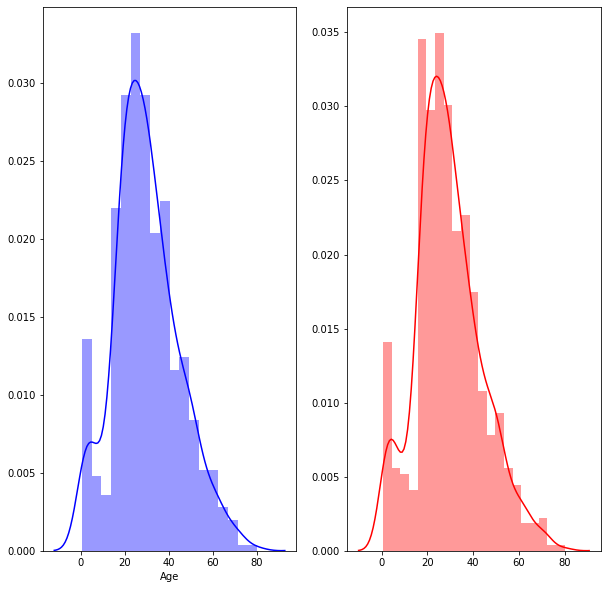

In [118]:
fig, ax = plt.subplots(1,2, figsize=(10,10))
sns.distplot(X_train['Age'], ax = ax[0], color='blue')
sns.distplot(X_train_0[:,0], ax = ax[1], color='red')

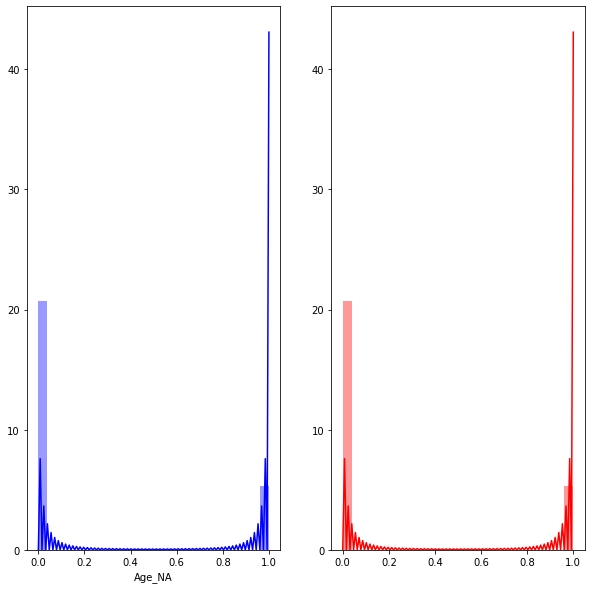

In [121]:
fig, ax = plt.subplots(1,2, figsize=(10,10))
sns.distplot(X_train['Age_NA'], ax = ax[0], color='blue')
sns.distplot(X_train_0[:,2], ax = ax[1], color='red')

In [122]:
from sklearn.impute import SimpleImputer
obj = SimpleImputer(missing_values = np.nan, strategy= 'mean')
X_train_mean = obj.fit_transform(X_train)
X_test_mean = obj.transform(X_test)

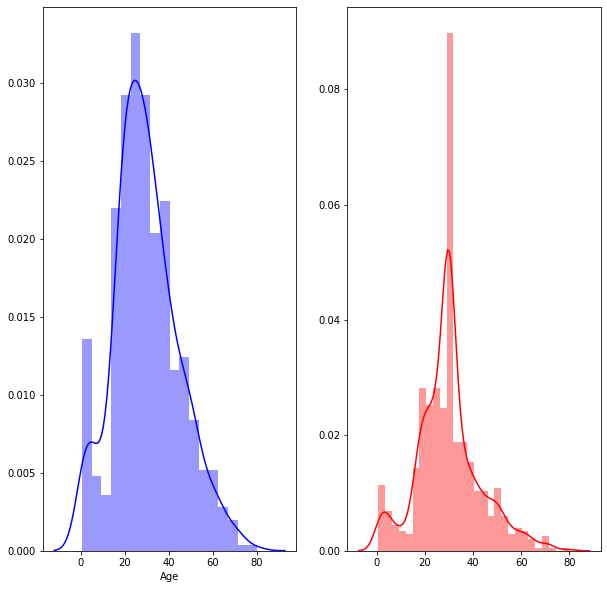

In [123]:
fig, ax = plt.subplots(1,2, figsize=(10,10))
sns.distplot(X_train['Age'], ax = ax[0], color='blue')
sns.distplot(X_train_mean[:,0], ax = ax[1], color='red')

In [124]:
from sklearn.impute import SimpleImputer
obj = SimpleImputer(missing_values = np.nan, strategy= 'median')
X_train_median = obj.fit_transform(X_train)
X_test_median = obj.transform(X_test)

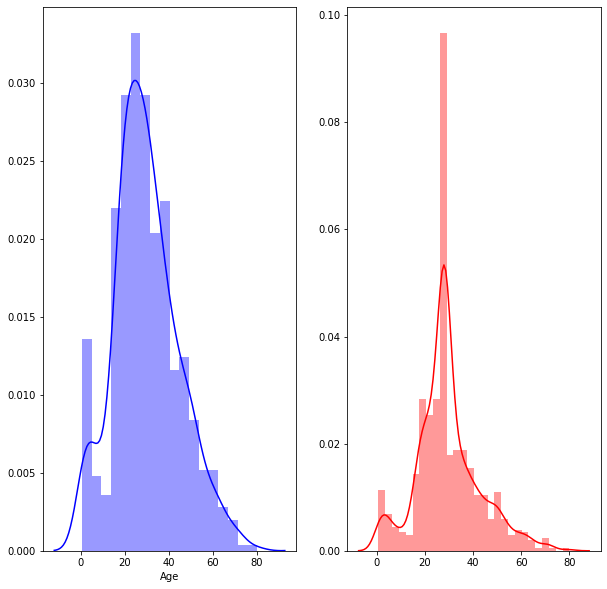

In [125]:
fig, ax = plt.subplots(1,2, figsize=(10,10))
sns.distplot(X_train['Age'], ax = ax[0], color='blue')
sns.distplot(X_train_median[:,0], ax = ax[1], color='red')

In [126]:
from sklearn.impute import SimpleImputer
obj = SimpleImputer(missing_values = np.nan, strategy= 'most_frequent')
X_train_mode = obj.fit_transform(X_train)
X_test_mode = obj.transform(X_test)

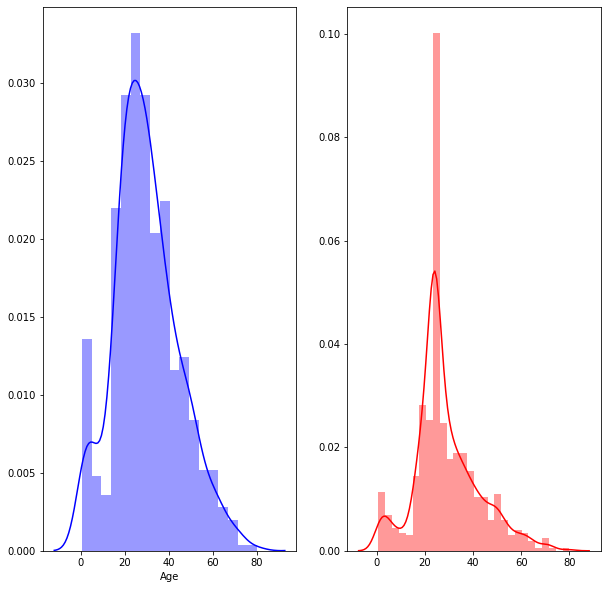

In [127]:
fig, ax = plt.subplots(1,2, figsize=(10,10))
sns.distplot(X_train['Age'], ax = ax[0], color='blue')
sns.distplot(X_train_mode[:,0], ax = ax[1], color='red')

In [128]:
print('Std original: ', X_train['Age'].std())
print('Std 0: ', X_train_0[:,0].std())
print('Std mean: ', X_train_mean[:,0].std())
print('Std median: ', X_train_median[:,0].std())
print('Std mode: ', X_train_mode[:,0].std())

Std original:  14.618618425326929
Std 0:  14.267336201581946
Std mean:  13.033904935435167
Std median:  13.055815161967498
Std mode:  13.24707378317607


### Model performance 

In [129]:
from sklearn.metrics import accuracy_score

In [130]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train_0,y_train)
y_pred = classifier.predict(X_test_0)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

classifier.fit(X_train_mean,y_train)
y_pred = classifier.predict(X_test_mean)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

classifier.fit(X_train_median,y_train)
y_pred = classifier.predict(X_test_median)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

classifier.fit(X_train_mode,y_train)
y_pred = classifier.predict(X_test_mode)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

0.6256983240223464
0.6424581005586593
0.6424581005586593
0.6424581005586593


In [131]:
from sklearn.linear_model import RidgeClassifierCV
classifier = RidgeClassifierCV()
classifier.fit(X_train_0,y_train)
y_pred = classifier.predict(X_test_0)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

classifier.fit(X_train_mean,y_train)
y_pred = classifier.predict(X_test_mean)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

classifier.fit(X_train_median,y_train)
y_pred = classifier.predict(X_test_median)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

classifier.fit(X_train_mode,y_train)
y_pred = classifier.predict(X_test_mode)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

0.6089385474860335
0.6089385474860335
0.6089385474860335
0.6089385474860335


In [132]:
from sklearn.linear_model import RidgeClassifierCV
classifier = RidgeClassifierCV()
classifier.fit(X_train_0,y_train)
y_pred = classifier.predict(X_test_0)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

classifier.fit(X_train_mean,y_train)
y_pred = classifier.predict(X_test_mean)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

classifier.fit(X_train_median,y_train)
y_pred = classifier.predict(X_test_median)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

classifier.fit(X_train_mode,y_train)
y_pred = classifier.predict(X_test_mode)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

0.6089385474860335
0.6089385474860335
0.6089385474860335
0.6089385474860335


In [133]:
from sklearn.svm import SVC
classifier = SVC()
classifier.fit(X_train_0,y_train)
y_pred = classifier.predict(X_test_0)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

classifier.fit(X_train_mean,y_train)
y_pred = classifier.predict(X_test_mean)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

classifier.fit(X_train_median,y_train)
y_pred = classifier.predict(X_test_median)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

classifier.fit(X_train_mode,y_train)
y_pred = classifier.predict(X_test_mode)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

0.6368715083798883
0.6424581005586593
0.6424581005586593
0.6312849162011173


In [134]:
from sklearn.neural_network import MLPClassifier
classifier = MLPClassifier()
classifier.fit(X_train_0,y_train)
y_pred = classifier.predict(X_test_0)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

classifier.fit(X_train_mean,y_train)
y_pred = classifier.predict(X_test_mean)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

classifier.fit(X_train_median,y_train)
y_pred = classifier.predict(X_test_median)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

classifier.fit(X_train_mode,y_train)
y_pred = classifier.predict(X_test_mode)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

0.664804469273743
0.6536312849162011
0.6368715083798883
0.6368715083798883


In [135]:
from sklearn.svm import LinearSVC
classifier = LinearSVC()
classifier.fit(X_train_0,y_train)
y_pred = classifier.predict(X_test_0)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

classifier.fit(X_train_mean,y_train)
y_pred = classifier.predict(X_test_mean)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

classifier.fit(X_train_median,y_train)
y_pred = classifier.predict(X_test_median)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

classifier.fit(X_train_mode,y_train)
y_pred = classifier.predict(X_test_mode)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

0.4134078212290503
0.6089385474860335
0.37988826815642457
0.5865921787709497


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [136]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train_0,y_train)
y_pred = classifier.predict(X_test_0)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

classifier.fit(X_train_mean,y_train)
y_pred = classifier.predict(X_test_mean)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

classifier.fit(X_train_median,y_train)
y_pred = classifier.predict(X_test_median)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

classifier.fit(X_train_mode,y_train)
y_pred = classifier.predict(X_test_mode)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

0.664804469273743
0.6983240223463687
0.6871508379888268
0.6983240223463687


In [137]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train_0,y_train)
y_pred = classifier.predict(X_test_0)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

classifier.fit(X_train_mean,y_train)
y_pred = classifier.predict(X_test_mean)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

classifier.fit(X_train_median,y_train)
y_pred = classifier.predict(X_test_median)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

classifier.fit(X_train_mode,y_train)
y_pred = classifier.predict(X_test_mode)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

0.6480446927374302
0.6871508379888268
0.6536312849162011
0.6703910614525139


In [138]:
from sklearn.ensemble import GradientBoostingClassifier
classifier = GradientBoostingClassifier()
classifier.fit(X_train_0,y_train)
y_pred = classifier.predict(X_test_0)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

classifier.fit(X_train_mean,y_train)
y_pred = classifier.predict(X_test_mean)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

classifier.fit(X_train_median,y_train)
y_pred = classifier.predict(X_test_median)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

classifier.fit(X_train_mode,y_train)
y_pred = classifier.predict(X_test_mode)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

0.6759776536312849
0.6927374301675978
0.7039106145251397
0.6703910614525139


In [139]:
from sklearn.linear_model import SGDClassifier
classifier = SGDClassifier()
classifier.fit(X_train_0,y_train)
y_pred = classifier.predict(X_test_0)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

classifier.fit(X_train_mean,y_train)
y_pred = classifier.predict(X_test_mean)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

classifier.fit(X_train_median,y_train)
y_pred = classifier.predict(X_test_median)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

classifier.fit(X_train_mode,y_train)
y_pred = classifier.predict(X_test_mode)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

0.6536312849162011
0.6312849162011173
0.659217877094972
0.659217877094972


In [140]:
from sklearn.linear_model import Perceptron
classifier = Perceptron()
classifier.fit(X_train_0,y_train)
y_pred = classifier.predict(X_test_0)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

classifier.fit(X_train_mean,y_train)
y_pred = classifier.predict(X_test_mean)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

classifier.fit(X_train_median,y_train)
y_pred = classifier.predict(X_test_median)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

classifier.fit(X_train_mode,y_train)
y_pred = classifier.predict(X_test_mode)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

0.6201117318435754
0.5865921787709497
0.4134078212290503
0.4245810055865922


In [141]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train_0,y_train)
y_pred = classifier.predict(X_test_0)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

classifier.fit(X_train_mean,y_train)
y_pred = classifier.predict(X_test_mean)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

classifier.fit(X_train_median,y_train)
y_pred = classifier.predict(X_test_median)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

classifier.fit(X_train_mode,y_train)
y_pred = classifier.predict(X_test_mode)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

0.6424581005586593
0.6368715083798883
0.6368715083798883
0.6424581005586593


In [142]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(X_train_0,y_train)
y_pred = classifier.predict(X_test_0)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

classifier.fit(X_train_mean,y_train)
y_pred = classifier.predict(X_test_mean)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

classifier.fit(X_train_median,y_train)
y_pred = classifier.predict(X_test_median)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

classifier.fit(X_train_mode,y_train)
y_pred = classifier.predict(X_test_mode)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

0.6145251396648045
0.6368715083798883
0.6424581005586593
0.6089385474860335
